inclination [deg]: i = 20
planet mass [Msun]: Mp = 1e-3
vshift+/-0.02: v = 0


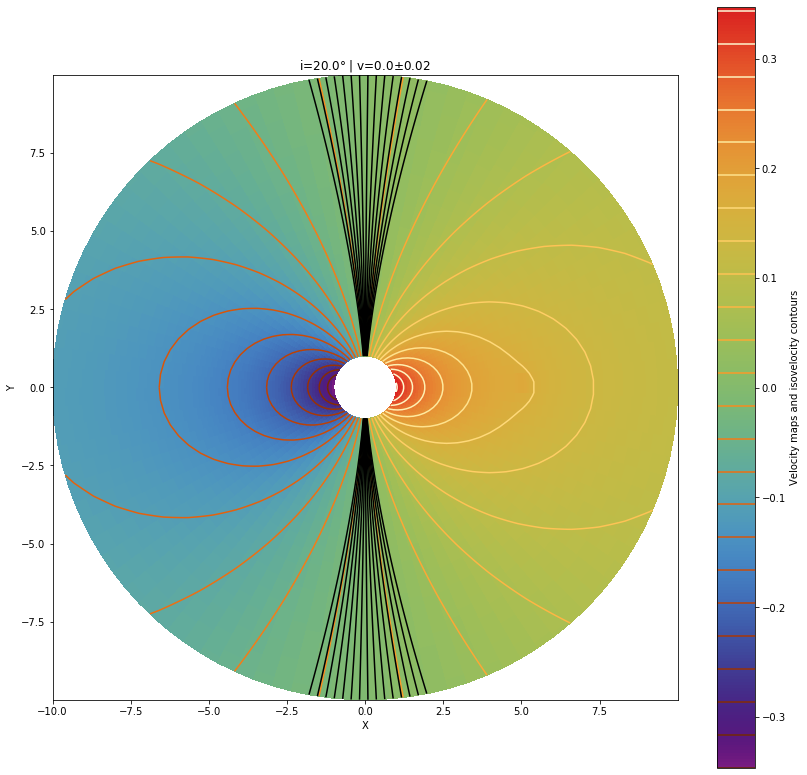

In [13]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import colorblind as cb

r=np.linspace(1,10,100)
p=np.linspace(-np.pi,np.pi,100)

R,P=np.meshgrid(r,p)
X=R*np.cos(P)
Y=R*np.sin(P)

# intersting values :
# incl = 20
# planet = 1e-3
# vshift = 0.16

print('inclination [deg]: i = ', end='')
incl = float(input())

print('planet mass [Msun]: Mp = ', end='')
planet = float(input())

dv = 0.02

print('vshift+/-%s: v = '%dv, end='')
vshift = float(input())

if planet!=0.0:
    Xc=-5+R*np.cos(P)
    Yc=R*np.sin(P)
    Rc=np.sqrt(Xc**2+Yc**2)
    Pc=np.arctan2(Yc,Xc)

fig,ax=plt.subplots(figsize=(14,14))
plt.ioff()

V0=np.zeros((len(r),len(p)))
V1=np.zeros((len(r),len(p)))
V=np.zeros((len(r),len(p)))
for i in range(len(r)):
    for j in range(len(p)):
        # V0[i,j]=(1/np.sqrt(R[i,j]))*(1-np.sin(incl*np.pi/180)*np.cos(P[i,j]))
        V0[i,j]=np.sqrt(1/R[i,j])*(np.sin(incl*np.pi/180)*np.cos(P[i,j]))
        if planet!=0:
            V1[i,j]=np.sqrt(planet/Rc[i,j])*(np.sin(incl*np.pi/180)*np.cos(P[i,j]))
        V[i,j]=V0[i,j]+V1[i,j]
        # if (V[i,j]>vshift-dv and V[i,j]<vshift+dv):
        #     ax.scatter(X[i,j],Y[i,j], c='k', s=1, zorder=2)

ext=[-r[-1],r[-1],-r[-1],r[-1]]

im=ax.pcolormesh(X,Y,V,cmap=cb.cbmap('rainbow'))
cbar=fig.colorbar(im,orientation='vertical')
cbar.set_label('Velocity maps and isovelocity contours')
if incl!=0:
    cont=ax.contour(X,Y,V,levels=np.arange(V.min(),V.max()+0.03,0.03), extent=ext, cmap=cb.reverse_colormap(cb.cbmap('huescale')))#'viridis_r')
    ax.contour(X,Y,V,levels=np.arange(vshift-dv,vshift+dv+0.003,0.003), extent=ext, colors='k', linestyles='solid')#'viridis_r')
    cbar.add_lines(cont)
    # plt.colorbar(cont,orientation='vertical')
ax.set_aspect('equal')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(r'i=%s° | v=%s$\pm$%s'%(incl,vshift,dv))
plt.show()
